In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize
import pandas as pd

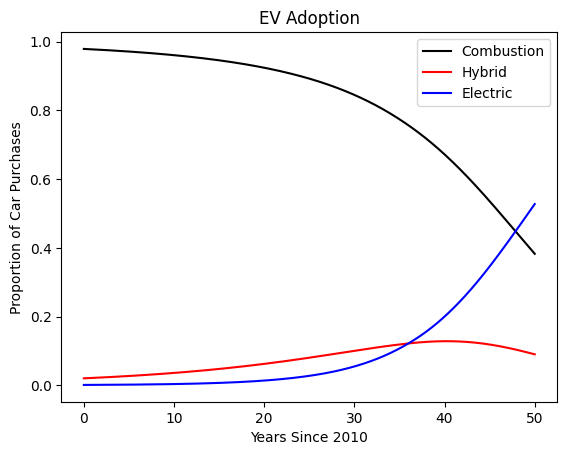

1000
200
Combustion:  0.9609980450400076
Hybrid:  0.03571742868034547
Electric:  0.0032845262796468255


In [31]:
# build model
def model(t, cars, ch, he, ec, hc, eh, ce, c, h, e):
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c*cars[0],
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h*cars[1],
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e*cars[2]])

# constants
# Model 1
# ch = 0.15 # rate from combustion to hybrid
# he = 0.2 # rate from hybrid to electric
# ec = 0.01 # rate from electric to combustion
# hc = 0.1 # rate from hybrid to combustion
# eh = 0.01 # rate from electric to hybrid
# ce = 0.1 # rate from combustion to electric
# c = 0.0 # rate of new combustion
# h = 0.0 # rate of new hybrid
# e = 0.0 # rate of new electric

# Model 2
# ch = 0.15 # rate from combustion to hybrid
# he = 0.2 # rate from hybrid to electric
# ec = 0.01 # rate from electric to combustion
# hc = 0.09 # rate from hybrid to combustion
# eh = 0.01 # rate from electric to hybrid
# ce = 0.15 # rate from combustion to electric

# Model 3
# ch = 0.15 # rate from combustion to hybrid
# he = 0.19 # rate from hybrid to electric
# ec = 0.001 # rate from electric to combustion
# hc = 0.001 # rate from hybrid to combustion
# eh = 0.01 # rate from electric to hybrid
# ce = 0.15 # rate from combustion to electric

# MODEL 
hc−ch = −0.09
ec−ce = −0.09
eh − he = −0.02, 

c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0 # rate of new electric

# initial conditions
C = 0.9792
H = 0.02
E = 0.0008

# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

# plot
plt.plot(sol.t, sol.y[0], label="Combustion", c="k")
plt.plot(sol.t, sol.y[1], label="Hybrid", c="r")
plt.plot(sol.t, sol.y[2], label="Electric", c="b")
plt.title("EV Adoption")
plt.xlabel("Years Since 2010")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.show()

# print values at t=10
print(len(sol.y[0]))
year = 2020
time = int((year - 2010) * 1000 / tf)
print(time)
print("Combustion: ", sol.y[0][time])
print("Hybrid: ", sol.y[1][time])
print("Electric: ", sol.y[2][time])


## Car Sales - Disaster Modeling 

Research :
Total vehicle sales https://fred.stlouisfed.org/series/TOTALSA
recession dates: https://fredhelp.stlouisfed.org/fred/data/understanding-the-data/recession-bars/



Incorporating the effects of economic disasters into our model is crucial. During economic downturns, consumers tend to prioritize essential expenses and delay discretionary spending, including vehicle purchases. By integrating economic disaster scenarios into our model, we can gain valuable insights into how the automotive market responds to adverse economic conditions. 

In order to understand the relationship that an economic disaster has on car sales, we first graph total car sales in relation to economic recessions.

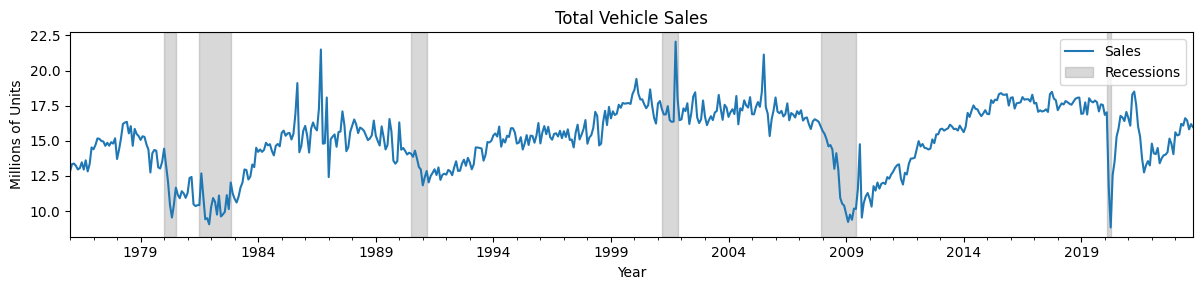

In [40]:
# show that there are drops in car prices during economic disasters

# read car sales data
car_sales = pd.read_csv('TOTALSA.csv')
car_sales['DATE'] = pd.to_datetime(car_sales['DATE']) # convert to datetime format
# read recession dates
recession = pd.read_csv('recession_dates.csv')[['Peaks', 'Troughs']]
# convert to datetime format
recession['Peaks'] = pd.to_datetime(recession['Peaks'])
recession['Troughs'] = pd.to_datetime(recession['Troughs'])

# create figure and plot car sales
fig, ax = plt.subplots(1,1,figsize=(12,3))
car_sales.plot(x='DATE', y='TOTALSA', ax=ax, c='#1f77b4')

# gray out the recession areas
for i in range(recession.shape[0]):
    ax.axvspan(recession.loc[i, 'Peaks'], recession.loc[i, 'Troughs'], alpha=0.3, color='gray')

# label plot
ax.set_title('Total Vehicle Sales')
ax.set_ylabel('Millions of Units')
ax.legend(['Sales', 'Recessions'])
ax.set_xlabel('Year')
plt.tight_layout()
plt.savefig('Total Vehicle Sales')
plt.show()

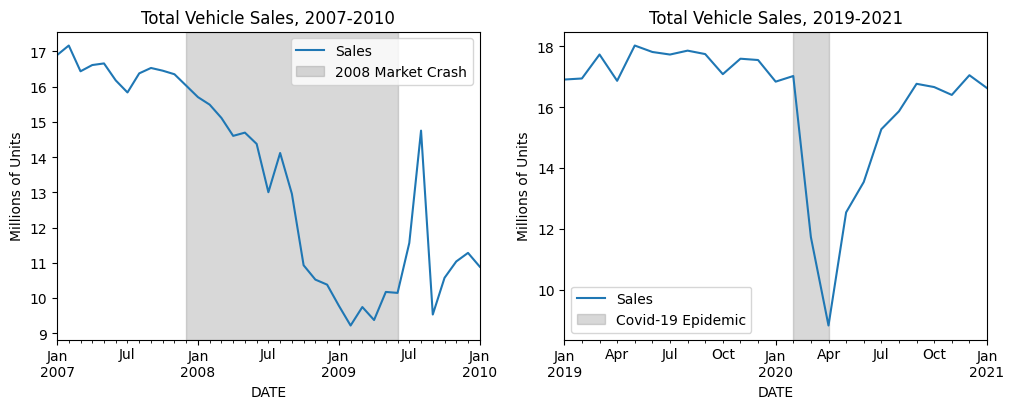

In [41]:
# create figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

# plot car sales
car_sales[(car_sales['DATE'] >= pd.to_datetime('2007-01-01')) & (car_sales['DATE'] <= pd.to_datetime('2010-01-01'))].plot(x='DATE', y='TOTALSA', ax=ax1)
car_sales[(car_sales['DATE'] >= pd.to_datetime('2019-01-01')) & (car_sales['DATE'] <= pd.to_datetime('2021-01-01'))].plot(x='DATE', y='TOTALSA', ax=ax2)

# gray out the recession areas
for i in range(recession.shape[0]):
    ax1.axvspan(recession.loc[i, 'Peaks'], recession.loc[i, 'Troughs'], alpha=0.3, color='gray')
    ax2.axvspan(recession.loc[i, 'Peaks'], recession.loc[i, 'Troughs'], alpha=0.3, color='gray')

# label plot
ax1.set_title('Total Vehicle Sales, 2007-2010')
ax1.set_ylabel('Millions of Units')
ax1.legend(['Sales', '2008 Market Crash'])
ax2.set_title('Total Vehicle Sales, 2019-2021')
ax2.set_ylabel('Millions of Units')
ax2.legend(['Sales', 'Covid-19 Epidemic'])
plt.show()

### Covid-19

/var/folders/bw/hb7ld_394fzb21vx3_dxpyyw0000gn/T/ipykernel_60210/2268499366.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.loc[:,'Months Since Disaster Start'] = range(covid.shape[0])


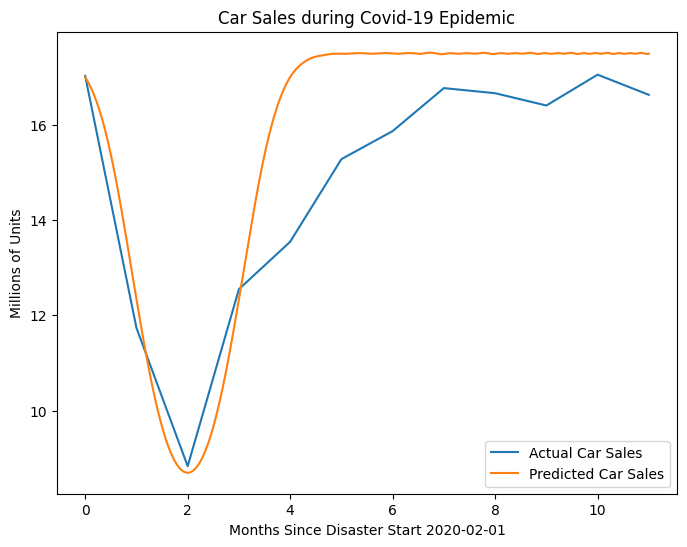

In [42]:
# compare model against covid-19
# create figure
fig, ax = plt.subplots(1,1,figsize=(8,6))

# covid car sales
covid = car_sales[(car_sales['DATE'] >= pd.to_datetime('2020-02-01')) & (car_sales['DATE'] <= pd.to_datetime('2021-01-01'))]
covid.loc[:,'Months Since Disaster Start'] = range(covid.shape[0])
# plot actual data
plt.plot(covid['Months Since Disaster Start'], covid['TOTALSA'], label='Actual Car Sales')

# modeling solution
initial_quantity = [17]  # Initial quantity of cars sold
r = .96  # Intensity rate of economic disaster
L = 8   # Lower carrying capacity (bottom limit) rock bottom of disaster
U = 17.5  # Upper carrying capacity (top limit) after disaster
E = 2  # time length of disaster

# Solve the ODE using solve_ivp
def economic_disaster(t, y, r, L, U, E):
    return r * y * (1 - (y - L) / (U - L))*(t-E)

t_span = (0, 11)
solution = solve_ivp(economic_disaster, t_span, initial_quantity, args=(r, L, U, E), dense_output=True)

# plot predicted solution
t = np.linspace(t_span[0], t_span[1], 1000)
y_solution = solution.sol(t)
plt.plot(t, y_solution[0], label='Predicted Car Sales')

# label plot
plt.title('Car Sales during Covid-19 Epidemic')
plt.ylabel('Millions of Units')
plt.xlabel('Months Since Disaster Start 2020-02-01')
plt.legend()
plt.show()

### 2008 Market Crash

/var/folders/bw/hb7ld_394fzb21vx3_dxpyyw0000gn/T/ipykernel_60210/1736841061.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.loc[:,'Months Since Disaster Start'] = range(housing.shape[0])


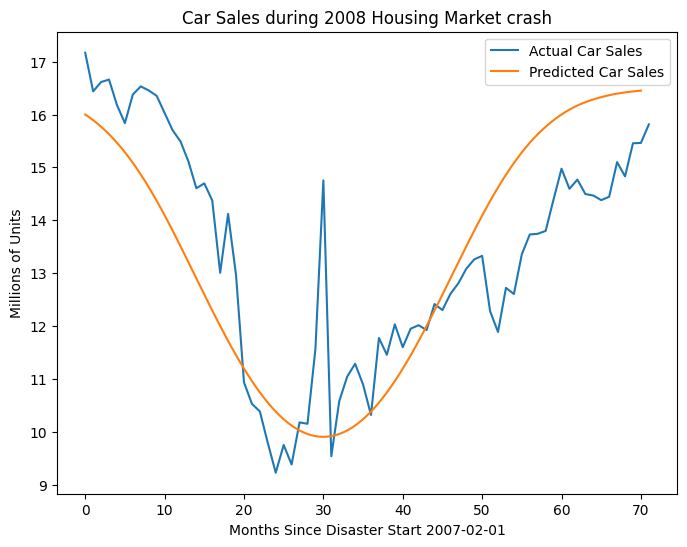

In [43]:
# compare model against 2008 housing crash
# create figure
fig, ax = plt.subplots(1,1,figsize=(8,6))

# covid car sales
housing = car_sales[(car_sales['DATE'] >= pd.to_datetime('2007-02-01')) & (car_sales['DATE'] <= pd.to_datetime('2013-01-01'))]
housing.loc[:,'Months Since Disaster Start'] = range(housing.shape[0])
# plot actual data
plt.plot(housing['Months Since Disaster Start'], housing['TOTALSA'], label='Actual Car Sales')

# modeling solution
initial_quantity = [16]  # Initial quantity of cars sold
r = .0035  # Intensity rate of economic disaster
L = 8   # Lower carrying capacity (bottom limit) rock bottom of disaster
U = 16.5  # Upper carrying capacity (top limit) after disaster
E = 30  

# Solve the ODE using solve_ivp
t_span = (0, 70)
solution = solve_ivp(economic_disaster, t_span, initial_quantity, args=(r, L, U, E), dense_output=True)

# plot predicted solution
t = np.linspace(t_span[0], t_span[1], 1000)
y_solution = solution.sol(t)
plt.plot(t, y_solution[0], label='Predicted Car Sales')

# label plot
plt.title('Car Sales during 2008 Housing Market crash')
plt.ylabel('Millions of Units')
plt.xlabel('Months Since Disaster Start 2007-02-01')
plt.legend()
plt.show()


### Covid-19 and 2008 in one graph:

/var/folders/bw/hb7ld_394fzb21vx3_dxpyyw0000gn/T/ipykernel_60210/2121483411.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing.loc[:,'Months Since Disaster Start'] = range(housing.shape[0])


          DATE  TOTALSA  Months Since Disaster Start
529 2020-02-01   17.026                            0
530 2020-03-01   11.736                            1
531 2020-04-01    8.834                            2
532 2020-05-01   12.549                            3
533 2020-06-01   13.545                            4
534 2020-07-01   15.279                            5
535 2020-08-01   15.868                            6
536 2020-09-01   16.770                            7
537 2020-10-01   16.663                            8
538 2020-11-01   16.405                            9
539 2020-12-01   17.052                           10
540 2021-01-01   16.629                           11


/var/folders/bw/hb7ld_394fzb21vx3_dxpyyw0000gn/T/ipykernel_60210/2121483411.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid.loc[:,'Months Since Disaster Start'] = range(covid.shape[0])


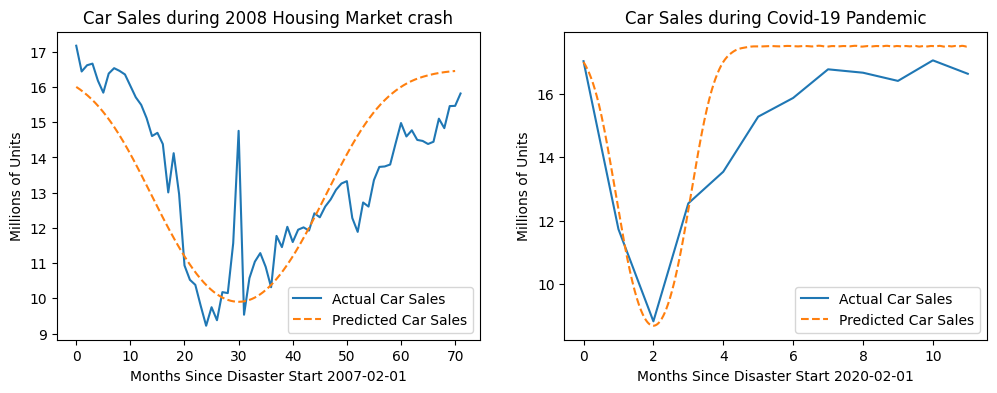

In [95]:
# economic disaster model
def economic_disaster(t, y, r, L, U, D):
    return r * y * (1 - (y - L) / (U - L))*(t-D)

# create figure
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))

##### 2008 Housing Crash #####
housing = car_sales[(car_sales['DATE'] >= pd.to_datetime('2007-02-01')) & (car_sales['DATE'] <= pd.to_datetime('2013-01-01'))]
housing.loc[:,'Months Since Disaster Start'] = range(housing.shape[0])
# plot actual data
ax1.plot(housing['Months Since Disaster Start'], housing['TOTALSA'], label='Actual Car Sales')

# modeling solution
initial_quantity = [16]  # Initial quantity of cars sold
r = .0035  # Intensity rate of economic disaster
L = 8   # Lower carrying capacity (bottom limit) rock bottom of disaster
U = 16.5  # Upper carrying capacity (top limit) after disaster
D = 30  

# Solve the ODE using solve_ivp
t_span = (0, 70)
solution = solve_ivp(economic_disaster, t_span, initial_quantity, args=(r, L, U, D), dense_output=True)

# plot predicted solution
t = np.linspace(t_span[0], t_span[1], 1000)
y_solution = solution.sol(t)
ax1.plot(t, y_solution[0], '--', label='Predicted Car Sales')

# label plot
ax1.set_title('Car Sales during 2008 Housing Market crash')
ax1.set_ylabel('Millions of Units')
ax1.set_xlabel('Months Since Disaster Start 2007-02-01')
# ax1.set_xticklabels()
# print(t)
ax1.legend()


##### Covid Car Sales #####
covid = car_sales[(car_sales['DATE'] >= pd.to_datetime('2020-02-01')) & (car_sales['DATE'] <= pd.to_datetime('2021-01-01'))]
covid.loc[:,'Months Since Disaster Start'] = range(covid.shape[0])
# covid['Label'] = covid['DATE'].astype(str).str.split('-')
# covid['Label'] = covid['Label'].apply(lambda x: x[1])
print(covid)
# plot actual data
plt.plot(covid['Months Since Disaster Start'], covid['TOTALSA'], label='Actual Car Sales')

# modeling solution
initial_quantity = [17]  # Initial quantity of cars sold
r = .96  # Intensity rate of economic disaster
L = 8   # Lower carrying capacity (bottom limit) rock bottom of disaster
U = 17.5  # Upper carrying capacity (top limit) after disaster
D = 2  # time length of disaster


t_span = (0, 11)
solution = solve_ivp(economic_disaster, t_span, initial_quantity, args=(r, L, U, D), dense_output=True)

# plot predicted solution
t = np.linspace(t_span[0], t_span[1], 1000)
y_solution = solution.sol(t)
ax2.plot(t, y_solution[0], '--',label='Predicted Car Sales')

# label plot
ax2.set_title('Car Sales during Covid-19 Pandemic')
ax2.set_ylabel('Millions of Units')
ax2.set_xlabel('Months Since Disaster Start 2020-02-01')
ax2.legend()

plt.savefig('ED_carsales', dpi=200, bbox_inches='tight')
plt.show()

Due to the trends seen in the total car sales during an economic disasater, we are able to predict the trajectory of car sales based on factors such as predicted disaster length (D) and and the rate of intensity of the disaster (r). In addition, our model includes an upper limit (U) and lower limit (L), and reflects the total number of car sales (y). 

\( r \cdot y \cdot \left(1 - \frac{y - L}{U - L}\right) \cdot (t - D) \).

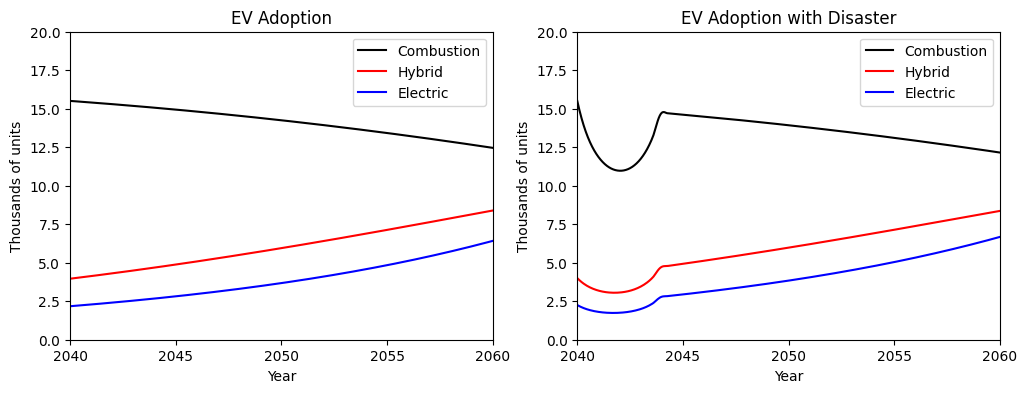

In [54]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(12,4))
# original model
def model(t, cars, ch, he, ec, hc, eh, ce, c, h, e):
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c*cars[0],
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h*cars[1],
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e*cars[2]])

# constants
# Model 1
ch = 0.0015 # rate from combustion to hybrid
he = 0.002 # rate from hybrid to electric
ec = 0.0001 # rate from electric to combustion
hc = 0.0001 # rate from hybrid to combustion
eh = 0.0001 # rate from electric to hybrid
ce = 0.001 # rate from combustion to electric

c = .001 # rate of new combustion
h = 0.025 # rate of new hybrid
e = 0.03 # rate of new electric

# initial conditions
C = 17
H = 1
E = .5
# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))


# plot
ax1.plot(sol.t + 2010, sol.y[0], label="Combustion", c="k")
ax1.plot(sol.t + 2010, sol.y[1], label="Hybrid", c="r")
ax1.plot(sol.t + 2010, sol.y[2], label="Electric", c="b")
ax1.set_title("EV Adoption")
ax1.set_xlabel("Year")
ax1.set_ylabel("Thousands of units")
ax1.set_xticks([2040, 2045, 2050, 2055, 2060])
ax1.set_ylim(0,20)
ax1.set_xlim(30 + 2010,50 + 2010)
ax1.legend()

# Define the economic_disaster function
def economic_disaster(t, y, r, L, U, E):
    return r * y * (1 - (y - L) / (U - L)) * (t - E)

# Define the ed_model incorporating the economic_disaster function
def ed_model(t, cars, ch, he, ec, hc, eh, ce, c, h, e, r, LC, LH, LE, U, D):
    if t < 2*D:
        economic_effect0 = economic_disaster(t, cars[0], r, LC, 0, D)
        economic_effect1 = economic_disaster(t, cars[1], r, LH, 0, D)
        economic_effect2 = economic_disaster(t, cars[2], r, LE, 0, D)
    else:
        economic_effect0 = 0
        economic_effect1 = 0
        economic_effect2 = 0       
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c*cars[0] + economic_effect0,
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h*cars[1] + economic_effect1,
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e*cars[2] + economic_effect2])

C = 15.5
H = 4
E = 2.25 # 
r = .1 # 
L = .5
LC = C*L
LH = H*L
LE = E*L
U = 0
D = 2


# Solve the ODE using solve_ivp
sol = solve_ivp(ed_model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e, r, LC, LH, LE, U, D), t_eval=np.linspace(t0, tf, 1000))

# Plot the results
ax2.plot(sol.t + 2040, sol.y[0], label="Combustion", c="k")
ax2.plot(sol.t + 2040, sol.y[1], label="Hybrid", c="r")
ax2.plot(sol.t + 2040, sol.y[2], label="Electric", c="b")
ax2.set_xlabel('Year')
ax2.set_ylabel('Thousands of units')
ax2.set_title('EV Adoption with Disaster')
ax2.set_ylim(0,20) 
ax2.set_xticks((sol.t + 2040).astype(int)[::100])
ax2.set_xlim(0 + 2040,20 + 2040)
ax2.legend()

plt.savefig('EV_adoption_disaster', bbox_inches='tight', dpi=200)
plt.show()


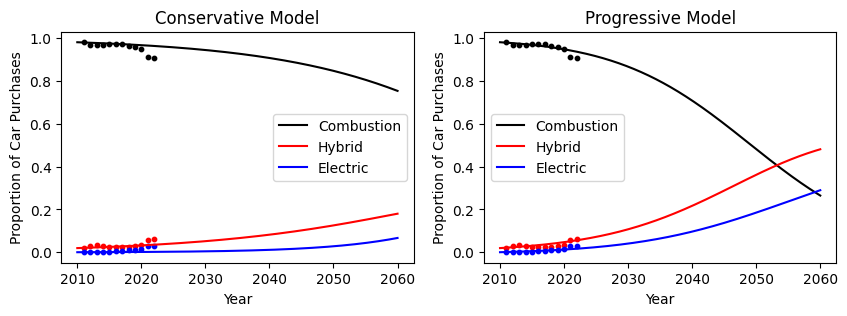

In [76]:
# build model
def model(t, cars, ch, he, ec, hc, eh, ce, c, h, e):
    return np.array([(hc-ch)*cars[0]*cars[1] + (ec-ce)*cars[0]*cars[2] + c,
                     (ch-hc)*cars[0]*cars[1] + (eh-he)*cars[1]*cars[2] + h,
                     (ce-ec)*cars[0]*cars[2] + (he-eh)*cars[1]*cars[2] + e])

# constants
ch = 0.15 # rate from combustion to hybrid
he = 0.1 # rate from hybrid to electric
ec = 0.01 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.01 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric
c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0 # rate of new electric

# initial conditions
C = 0.9792
H = 0.02
E = 0.0008

# time points
t0 = 0
tf = 50

# solve ODE
sol = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

ch = 0.19 # rate from combustion to hybrid
he = 0.2 # rate from hybrid to electric
ec = 0.01 # rate from electric to combustion
hc = 0.1 # rate from hybrid to combustion
eh = 0.18 # rate from electric to hybrid
ce = 0.1 # rate from combustion to electric
c = 0.0 # rate of new combustion
h = 0.0 # rate of new hybrid
e = 0.0007 # rate of new electric

sol2 = solve_ivp(model, [t0, tf], [C, H, E], args=(ch, he, ec, hc, eh, ce, c, h, e), t_eval=np.linspace(t0, tf, 1000))

rel_sales_df = pd.read_csv('rel_sales_df.csv')

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
color_map = {
    'blue': colors[0],
    'orange': colors[1],
    'green': colors[2],
    'red': colors[3],
}

# plot
plt.figure(figsize=(10, 3))
plt.subplot(121)

dot_size = 10
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color="r", s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color="k", s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color="b", s=dot_size)
# plt.scatter(rel_sales_df['Year'], rel_sales_df['Station Locations Ratio'], color=color_map['red'], s=dot_size)
plt.plot(sol.t + 2010, sol.y[0], label="Combustion", c="k")
plt.plot(sol.t + 2010, sol.y[1], label="Hybrid", c="r")
plt.plot(sol.t + 2010, sol.y[2], label="Electric", c="b")
# plt.xlim(2010,2023)
plt.title("Conservative Model")
plt.xlabel("Year")
plt.ylabel("Proportion of Car Purchases")
plt.legend()

plt.subplot(122)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Hybrid_ratio'], color="r", s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Combustion_ratio'], color="k", s=dot_size)
plt.scatter(rel_sales_df['Year'], rel_sales_df['Electric_ratio'], color="b", s=dot_size)
plt.plot(sol2.t + 2010, sol2.y[0], label="Combustion", c="k")
plt.plot(sol2.t + 2010, sol2.y[1], label="Hybrid", c="r")
plt.plot(sol2.t + 2010, sol2.y[2], label="Electric", c="b")
# plt.xlim(2010,2023)
plt.title("Progressive Model")
plt.xlabel("Year")
plt.ylabel("Proportion of Car Purchases")
plt.legend()
plt.savefig('original_model.png', dpi=200, bbox_inches='tight')
plt.show()